In [1]:
from pyNN.morphology import NeuroMLMorphology, load_morphology, uniform, random_section, dendrites, apical_dendrites, by_distance
import pyNN.arbor as sim

In [2]:
pyr_morph = load_morphology("single_cell_detailed.swc", replace_axon=None)

In [3]:
cc = sim.MultiCompartmentNeuron.setup(
				label="MyCell",
				ion_channels={'pas': sim.PassiveLeak,
							  'na': sim.NaChannel,
							  'kdr': sim.KdrChannel},
				ionic_species={'na_ion': sim.NaIon,
							   'k_ion': sim.KIon})
mycell = cc(morphology=pyr_morph,
			cm=1.0,
			Ra=500.0,
			na_ion = {"internal_concentration": 10.0, "external_concentration": 140.0, "reversal_potential": 50.0},
			k_ion = {"internal_concentration": 54.4, "external_concentration": 2.5, "reversal_potential": -77.0},
			pas={"conductance_density": uniform('all', 0.0003),
				"e_rev":-54.3},
			na={"conductance_density": uniform('soma', 0.120),
			   "e_rev": 50.0},
			kdr={"conductance_density": uniform('soma', 0.036),
				"e_rev": -77.0})

In [4]:
cells = sim.Population(1, mycell, initial_values={'v': -50.0})
#cells = sim.Population(3, mycell, initial_values={'v': -60.0})

In [5]:
step_current = sim.DCSource(amplitude=5.0, start=50.0, stop=150.0)

In [6]:
step_current.inject_into(cells[0:1], location="soma")

In [7]:
cells.record('spikes')

In [8]:
# sim.run(200.0)
sim.state.run(200.0, cells)

In [9]:
sim.state.model

<arbor.single_cell_model>

In [10]:
# (8) Print spike times.
if len(sim.state.model.spikes) > 0:
    print("{} spikes:".format(len(sim.state.model.spikes)))
    for s in sim.state.model.spikes:
        print("{:3.3f}".format(s))
else:
    print("no spikes")

no spikes


In [11]:
from matplotlib import pyplot

In [12]:
# df = pandas.DataFrame({"t/ms": m.traces[0].time, "U/mV": m.traces[0].value})
pyplot.plot(sim.state.model.traces[0].time, sim.state.model.traces[0].value)

IndexError: list index out of range

In [13]:
sim.state.model.traces

[]

In [14]:
m = sim.state.model

In [15]:
m.run(tfinal=30)

In [16]:
if len(m.spikes) > 0:
    print("{} spikes:".format(len(m.spikes)))
    for s in m.spikes:
        print("{:3.3f}".format(s))
else:
    print("no spikes")

no spikes


In [17]:
cells

Population(3, MultiCompartmentNeuron(<parameters>), structure=Line(dx=1.0, x0=0.0, y=0.0, z=0.0), label='population0')

In [18]:
import arbor

In [19]:
cells.all_cells[0]._cell._arbor_morphology

In [20]:
cells.all_cells[0]._cell._arbor_labels

(label_dict (region  "ionchnl_pas_in_all" (all)) (region  "soma" (tag 1)) (region  "basal_dendrite" (tag 3)) (region  "apical_dendrite" (tag 4)) (region  "everywhere" (all)) (locset "soma_midpoint" (restrict (on_branches 0.5) (tag 1))) (locset "basal_dendrite_midpoint" (restrict (on_branches 0.5) (tag 3))) (locset "apical_dendrite_midpoint" (restrict (on_branches 0.5) (tag 4))))

In [21]:
cells.all_cells[0]._cell._decor

In [22]:
ac = arbor.cable_cell(cells.all_cells[0]._cell._arbor_morphology,
                     cells.all_cells[0]._cell._arbor_labels,
                     cells.all_cells[0]._cell._decor)

In [23]:
mod = arbor.single_cell_model(ac)

In [24]:
mod.probe("voltage", '"soma_midpoint"', frequency=10)

In [25]:
mod.run(tfinal=30)

In [26]:
if len(mod.spikes) > 0:
    print("{} spikes:".format(len(mod.spikes)))
    for s in mod.spikes:
        print("{:3.3f}".format(s))
else:
    print("no spikes")

no spikes


In [27]:
# (1) Create a morphology with a single (cylindrical) segment of length=diameter=6 μm
tree1 = arbor.segment_tree()
tree1.append(arbor.mnpos, arbor.mpoint(-3, 0, 0, 3), arbor.mpoint(3, 0, 0, 3), tag=1)

# (2) Define the soma and its midpoint
labels1 = arbor.label_dict({"soma": "(tag 1)", "midpoint": "(location 0 0.5)"})

# (3) Create and set up a decor object
decor1 = arbor.decor()
decor1.set_property(Vm=-40)
decor1.paint('"soma"', arbor.density('hh'))
decor1.place('"midpoint"', arbor.iclamp( 10, 2, 0.8), "iclamp")
decor1.place('"midpoint"', arbor.spike_detector(-10), "detector")

In [28]:
cells.all_cells[1]._cell._arbor_tree = tree1
cells.all_cells[1]._cell._arbor_labels = labels1
cells.all_cells[1]._cell._decor = decor1
cells.all_cells[1]._cell._arbor_morphology = arbor.morphology(tree1)

In [29]:
ac1 = arbor.cable_cell(cells.all_cells[1]._cell._arbor_tree,
                     cells.all_cells[1]._cell._arbor_labels,
                     cells.all_cells[1]._cell._decor)
mod1 = arbor.single_cell_model(ac1)
mod1.probe("voltage", '"midpoint"', frequency=10)

Using tree or morphology, its all the same.

In [30]:
ac1 = arbor.cable_cell(cells.all_cells[1]._cell._arbor_morphology,
                     cells.all_cells[1]._cell._arbor_labels,
                     cells.all_cells[1]._cell._decor)
mod1 = arbor.single_cell_model(ac1)
mod1.probe("voltage", '"midpoint"', frequency=10)

In [31]:
mod1.run(tfinal=30)

In [32]:
if len(mod1.spikes) > 0:
    print("{} spikes:".format(len(mod1.spikes)))
    for s in mod1.spikes:
        print("{:3.3f}".format(s))
else:
    print("no spikes")

1 spikes:
10.084


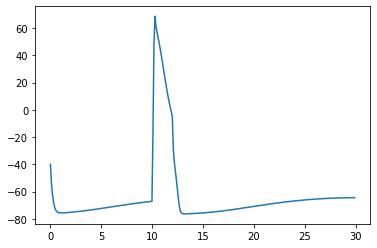

In [33]:
pyplot.plot(mod1.traces[0].time, mod1.traces[0].value)

In [34]:
cells.all_cells[1]._cell._arbor_tree

In [35]:
cells.all_cells[0]._cell._arbor_tree

In [36]:
cells.all_cells[1]._cell._arbor_labels

(label_dict (region  "soma" (tag 1)) (locset "midpoint" (location 0 0.5)))

In [37]:
cells.all_cells[0]._cell._arbor_labels

(label_dict (region  "ionchnl_pas_in_all" (all)) (region  "soma" (tag 1)) (region  "basal_dendrite" (tag 3)) (region  "apical_dendrite" (tag 4)) (region  "everywhere" (all)) (locset "soma_midpoint" (restrict (on_branches 0.5) (tag 1))) (locset "basal_dendrite_midpoint" (restrict (on_branches 0.5) (tag 3))) (locset "apical_dendrite_midpoint" (restrict (on_branches 0.5) (tag 4))))

In [38]:
cells.all_cells[1]._cell._decor

In [39]:
cells.all_cells[0]._cell._decor

In [40]:
# (1) Create a morphology with a single (cylindrical) segment of length=diameter=6 μm
tree2 = arbor.segment_tree()
# Start with segment 0: a cylindrical soma with tag 1
tree2.append(arbor.mnpos, arbor.mpoint(0.0, 0.0, 0.0, 2.0), arbor.mpoint( 40.0, 0.0, 0.0, 2.0), tag=1)
# Construct the first section of the dendritic tree with tag 3,
# comprised of segments 1 and 2, attached to soma segment 0.
tree2.append(0,     arbor.mpoint(40.0, 0.0, 0.0, 0.8), arbor.mpoint( 80.0,  0.0, 0.0, 0.8), tag=3)
tree2.append(1,     arbor.mpoint(80.0, 0.0, 0.0, 0.8), arbor.mpoint(120.0, -5.0, 0.0, 0.8), tag=3)
# Construct the rest of the dendritic tree: segments 3, 4 and 5.
tree2.append(2,     arbor.mpoint(120.0, -5.0, 0.0, 0.8), arbor.mpoint(200.0,  40.0, 0.0, 0.4), tag=3)
tree2.append(3,     arbor.mpoint(200.0, 40.0, 0.0, 0.4), arbor.mpoint(260.0,  60.0, 0.0, 0.2), tag=3)
tree2.append(2,     arbor.mpoint(120.0, -5.0, 0.0, 0.5), arbor.mpoint(190.0, -30.0, 0.0, 0.5), tag=3)
# Construct a special region of the tree made of segments 6, 7, and 8
# differentiated from the rest of the tree using tag 4.
tree2.append(5,     arbor.mpoint(190.0, -30.0, 0.0, 0.5), arbor.mpoint(240.0, -70.0, 0.0, 0.2), tag=4)
tree2.append(5,     arbor.mpoint(190.0, -30.0, 0.0, 0.5), arbor.mpoint(230.0, -10.0, 0.0, 0.2), tag=4)
tree2.append(7,     arbor.mpoint(230.0, -10.0, 0.0, 0.2), arbor.mpoint(360.0, -20.0, 0.0, 0.2), tag=4)
# Construct segments 9 and 10 that make up the axon with tag 2.
# Segment 9 is at the root, where its proximal end will be connected to the
# proximal end of the soma segment.
tree2.append(arbor.mnpos, arbor.mpoint( 0.0, 0.0, 0.0, 2.0), arbor.mpoint(  -70.0, 0.0, 0.0, 0.4), tag=2)
tree2.append(9,     arbor.mpoint(-70.0, 0.0, 0.0, 0.4), arbor.mpoint(-100.0, 0.0, 0.0, 0.4), tag=2)

# (2) Define the soma and its midpoint
labels2 = arbor.label_dict({
  "soma": "(tag 1)",
  "axon": "(tag 2)",
  "dend": "(tag 3)",
  "apic": "(tag 4)",
  "all": "(all)",
  "midpoint": "(location 0 0.5)",
  # Add a label for the parts of the morphology with radius greater than 1.5 μm.
  "gt_1.5": '(radius-ge (region "all") 1.5)',
  # Join regions "apic" and "gt_1.5"
  "custom": '(join (region "apic") (region "gt_1.5"))',
  # Add a labels for the root of the morphology and all the terminal points
  "root": "(root)",
  "terminal": "(terminal)",
  # Add a label for the terminal locations in the "custom" region:
  "custom_terminal": '(restrict (locset "terminal") (region "custom"))',
  # Add a label for the terminal locations in the "axon" region:
  "axon_terminal": '(restrict (locset "terminal") (region "axon"))',
})

# (3) Create and set up a decor object
decor2 = arbor.decor()
# Set the default properties of the cell (this overrides the model defaults).
decor2.set_property(Vm=-55)
decor2.set_ion("na", int_con=10, ext_con=140, rev_pot=50, method="nernst/na")
decor2.set_ion("k", int_con=54.4, ext_con=2.5, rev_pot=-77)
# Override the cell defaults.
decor2.paint('"custom"', tempK=270)
decor2.paint('"soma"', Vm=-50)
# Paint density mechanisms.
decor2.paint('"all"', arbor.density("pas"))
decor2.paint('"custom"', arbor.density("hh"))
decor2.paint('"dend"', arbor.density("hh", {"gkbar": 0.001}))
# Place stimuli and detectors.
decor2.place('"root"', arbor.iclamp(10, 1, current=2), "iclamp0")
decor2.place('"root"', arbor.iclamp(30, 1, current=2), "iclamp1")
decor2.place('"root"', arbor.iclamp(50, 1, current=2), "iclamp2")
#decor.place('"axon_terminal"', arbor.threshold_detector(-10), "detector")
decor2.place('"axon_terminal"', arbor.spike_detector(-10), "detector")

decor2.place('"midpoint"', arbor.iclamp( 10, 2, 0.8), "iclamp")
decor2.place('"midpoint"', arbor.spike_detector(-10), "detector")

In [41]:
cells.all_cells[2]._cell._arbor_tree = tree2
cells.all_cells[2]._cell._arbor_labels = labels2
cells.all_cells[2]._cell._decor = decor2
cells.all_cells[2]._cell._arbor_morphology = arbor.morphology(tree2)

In [43]:
ac2 = arbor.cable_cell(cells.all_cells[2]._cell._arbor_morphology,
                     cells.all_cells[2]._cell._arbor_labels,
                     cells.all_cells[2]._cell._decor)
mod2 = arbor.single_cell_model(ac2)
mod2.probe("voltage", '"midpoint"', frequency=10)

In [44]:
mod2.run(tfinal=100, dt=0.025)

In [45]:
print(len(mod2.spikes), "spikes recorded:")
for s in mod2.spikes:
    print(s)

6 spikes recorded:
10.582201928264613
30.81040471832684
50.81485480943406
10.530453896642289
30.768594867365657
50.77311708798183


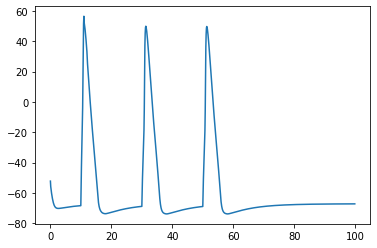

In [46]:
pyplot.plot(mod2.traces[0].time, mod2.traces[0].value)

In [77]:
cells.all_cells[0]._cell._arbor_tree

In [79]:
help(cells.all_cells[0]._cell._arbor_tree)

Help on segment_tree in module arbor._arbor object:

class segment_tree(pybind11_builtins.pybind11_object)
 |  Method resolution order:
 |      segment_tree
 |      pybind11_builtins.pybind11_object
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(...)
 |      __init__(self: arbor._arbor.segment_tree) -> None
 |  
 |  __str__(...)
 |      __str__(self: arbor._arbor.segment_tree) -> str
 |  
 |  append(...)
 |      append(*args, **kwargs)
 |      Overloaded function.
 |      
 |      1. append(self: arbor._arbor.segment_tree, parent: int, prox: arbor._arbor.mpoint, dist: arbor._arbor.mpoint, tag: int) -> int
 |      
 |      Append a segment to the tree.
 |      
 |      2. append(self: arbor._arbor.segment_tree, parent: int, dist: arbor._arbor.mpoint, tag: int) -> int
 |      
 |      Append a segment to the tree.
 |      
 |      3. append(self: arbor._arbor.segment_tree, parent: int, x: float, y: float, z: float, radius: float, tag: int) -> int
 |      
 |    

In [47]:
cells.all_cells[2]._cell._arbor_tree.size

11

In [49]:
cells.all_cells[0]._cell._arbor_tree.size

11

In [50]:
cells.all_cells[2]._cell._arbor_tree.segments

In [52]:
cells.all_cells[0]._cell._arbor_tree.segments

Backend Morphology Works

In [67]:
acX = arbor.cable_cell(cells.all_cells[0]._cell._arbor_morphology,
                     cells.all_cells[2]._cell._arbor_labels,
                     cells.all_cells[2]._cell._decor)
modX = arbor.single_cell_model(acX)
modX.probe("voltage", '"midpoint"', frequency=10)
modX.run(tfinal=100, dt=0.025)
print(len(modX.spikes), "spikes recorded:")
for s in modX.spikes:
    print(s)

3 spikes recorded:
10.165578581468756
30.29908895575769
50.299320853417214


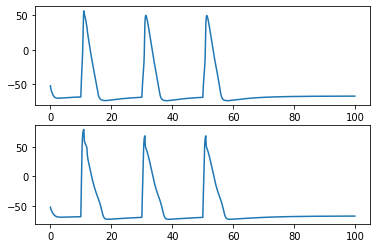

In [68]:
ax1 = pyplot.subplot(211)
ax1.plot(mod2.traces[0].time, mod2.traces[0].value)

ax2 = pyplot.subplot(212, sharex=ax1)
ax2.plot(modX.traces[0].time, modX.traces[0].value)

pyplot.show()

Renaming the decor does not work

In [69]:
cells.all_cells[0]._cell._arbor_labels

(label_dict (region  "ionchnl_pas_in_all" (all)) (region  "soma" (tag 1)) (region  "basal_dendrite" (tag 3)) (region  "apical_dendrite" (tag 4)) (region  "everywhere" (all)) (locset "soma_midpoint" (restrict (on_branches 0.5) (tag 1))) (locset "basal_dendrite_midpoint" (restrict (on_branches 0.5) (tag 3))) (locset "apical_dendrite_midpoint" (restrict (on_branches 0.5) (tag 4))))

In [74]:
# (3) Create and set up a decor object
decorX = arbor.decor()
# Set the default properties of the cell (this overrides the model defaults).
decorX.set_property(Vm=-55)
decorX.set_ion("na", int_con=10, ext_con=140, rev_pot=50, method="nernst/na")
decorX.set_ion("k", int_con=54.4, ext_con=2.5, rev_pot=-77)
# Override the cell defaults.
decorX.paint('"soma"', tempK=270)  # since there are no custom label
decorX.paint('"soma"', Vm=-50)
# Paint density mechanisms.
decorX.paint('"everywhere"', arbor.density("pas"))  # since no all
decorX.paint('"soma"', arbor.density("hh"))
decorX.paint('"basal_dendrite"', arbor.density("hh", {"gkbar": 0.001}))  # since no dend
# Place stimuli and detectors.
decorX.place('"soma_midpoint"', arbor.iclamp(10, 1, current=2), "iclamp0")  # since no root label
decorX.place('"soma_midpoint"', arbor.iclamp(30, 1, current=2), "iclamp1")
decorX.place('"soma_midpoint"', arbor.iclamp(50, 1, current=2), "iclamp2")
#decor.place('"axon_terminal"', arbor.threshold_detector(-10), "detector")
decorX.place('"apical_dendrite_midpoint"', arbor.spike_detector(-10), "detector")  # since no axon_terminal

decorX.place('"soma_midpoint"', arbor.iclamp( 10, 2, 0.8), "iclamp")  # since no midpoint label
decorX.place('"soma_midpoint"', arbor.spike_detector(-10), "detector")

In [85]:
acX = arbor.cable_cell(cells.all_cells[0]._cell._arbor_morphology,
                     cells.all_cells[0]._cell._arbor_labels,
                     decorX)
modX = arbor.single_cell_model(acX)
modX.probe("voltage", '"soma_midpoint"', frequency=10)
modX.run(tfinal=100, dt=0.025)
print(len(modX.spikes), "spikes recorded:")
for s in modX.spikes:
    print(s)

3 spikes recorded:
10.165578581468756
30.29908895575769
50.299320853417214


In [75]:
acX = arbor.cable_cell(cells.all_cells[0]._cell._arbor_morphology,
                     cells.all_cells[0]._cell._arbor_labels,
                     decorX)
modX = arbor.single_cell_model(acX)
modX.probe("voltage", '"soma_midpoint"', frequency=10)
modX.run(tfinal=100, dt=0.025)
print(len(modX.spikes), "spikes recorded:")
for s in modX.spikes:
    print(s)

0 spikes recorded:


Adding labels works

In [76]:
cells.all_cells[0]._cell._arbor_labels

(label_dict (region  "ionchnl_pas_in_all" (all)) (region  "soma" (tag 1)) (region  "basal_dendrite" (tag 3)) (region  "apical_dendrite" (tag 4)) (region  "everywhere" (all)) (locset "soma_midpoint" (restrict (on_branches 0.5) (tag 1))) (locset "basal_dendrite_midpoint" (restrict (on_branches 0.5) (tag 3))) (locset "apical_dendrite_midpoint" (restrict (on_branches 0.5) (tag 4))))

In [82]:
cells.all_cells[0]._cell._arbor_labels["axon"] = "(tag 2)"
cells.all_cells[0]._cell._arbor_labels["dend"] = "(tag 3)"
cells.all_cells[0]._cell._arbor_labels["apic"] = "(tag 4)"
cells.all_cells[0]._cell._arbor_labels["all"] = "(all)"
cells.all_cells[0]._cell._arbor_labels["midpoint"] = "(location 0 0.5)"
  # Add a label for the parts of the morphology with radius greater than 1.5 μm.
cells.all_cells[0]._cell._arbor_labels["gt_1.5"] = '(radius-ge (region "all") 1.5)'
  # Join regions "apic" and "gt_1.5"
cells.all_cells[0]._cell._arbor_labels["custom"] = '(join (region "apic") (region "gt_1.5"))'
  # Add a labels for the root of the morphology and all the terminal points
cells.all_cells[0]._cell._arbor_labels["root"] = "(root)"
cells.all_cells[0]._cell._arbor_labels["terminal"] = "(terminal)"
  # Add a label for the terminal locations in the "custom" region:
cells.all_cells[0]._cell._arbor_labels["custom_terminal"] = '(restrict (locset "terminal") (region "custom"))'
  # Add a label for the terminal locations in the "axon" region:
cells.all_cells[0]._cell._arbor_labels["axon_terminal"] = '(restrict (locset "terminal") (region "axon"))'

In [83]:
cells.all_cells[0]._cell._arbor_labels

(label_dict (region  "custom" (join (region "apic") (region "gt_1.5"))) (region  "gt_1.5" (radius-ge (region "all") 1.5)) (region  "all" (all)) (region  "apic" (tag 4)) (region  "dend" (tag 3)) (region  "axon" (tag 2)) (region  "ionchnl_pas_in_all" (all)) (region  "soma" (tag 1)) (region  "basal_dendrite" (tag 3)) (region  "apical_dendrite" (tag 4)) (region  "everywhere" (all)) (locset "root" (root)) (locset "midpoint" (location 0 0.5)) (locset "axon_terminal" (restrict (locset "terminal") (region "axon"))) (locset "soma_midpoint" (restrict (on_branches 0.5) (tag 1))) (locset "custom_terminal" (restrict (locset "terminal") (region "custom"))) (locset "terminal" (terminal)) (locset "basal_dendrite_midpoint" (restrict (on_branches 0.5) (tag 3))) (locset "apical_dendrite_midpoint" (restrict (on_branches 0.5) (tag 4))))

In [84]:
# (3) Create and set up a decor object
decorX = arbor.decor()
# Set the default properties of the cell (this overrides the model defaults).
decorX.set_property(Vm=-55)
decorX.set_ion("na", int_con=10, ext_con=140, rev_pot=50, method="nernst/na")
decorX.set_ion("k", int_con=54.4, ext_con=2.5, rev_pot=-77)
# Override the cell defaults.
decorX.paint('"custom"', tempK=270)
decorX.paint('"soma"', Vm=-50)
# Paint density mechanisms.
decorX.paint('"all"', arbor.density("pas"))
decorX.paint('"custom"', arbor.density("hh"))
decorX.paint('"dend"', arbor.density("hh", {"gkbar": 0.001}))
# Place stimuli and detectors.
decorX.place('"root"', arbor.iclamp(10, 1, current=2), "iclamp0")
decorX.place('"root"', arbor.iclamp(30, 1, current=2), "iclamp1")
decorX.place('"root"', arbor.iclamp(50, 1, current=2), "iclamp2")
#decor.place('"axon_terminal"', arbor.threshold_detector(-10), "detector")
decorX.place('"axon_terminal"', arbor.spike_detector(-10), "detector")

decorX.place('"midpoint"', arbor.iclamp( 10, 2, 0.8), "iclamp")
decorX.place('"midpoint"', arbor.spike_detector(-10), "detector")

In [86]:
acX = arbor.cable_cell(cells.all_cells[0]._cell._arbor_morphology,
                     cells.all_cells[0]._cell._arbor_labels,
                     decorX)
modX = arbor.single_cell_model(acX)
modX.probe("voltage", '"soma_midpoint"', frequency=10)
modX.run(tfinal=100, dt=0.025)
print(len(modX.spikes), "spikes recorded:")
for s in modX.spikes:
    print(s)

3 spikes recorded:
10.165578581468756
30.29908895575769
50.299320853417214


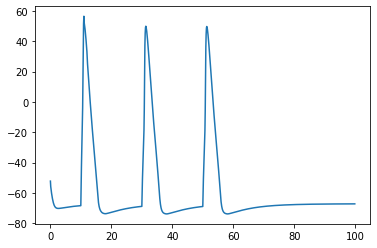

In [58]:
pyplot.plot(mod2.traces[0].time, mod2.traces[0].value)

In [87]:
name = "soma"

In [88]:
"(restrict (locset 'terminal') (region '" + name + "'))"

"(restrict (locset 'terminal') (region 'soma'))"